In [16]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Cargar dataset
df = pd.read_csv("data/Sample - Superstore.csv", encoding='latin1')

In [5]:
# Crear motor SQLite (archivo local)
engine = create_engine("sqlite:///superstore.db")

# Guardar el DataFrame como tabla SQL
df.to_sql("ventas", con=engine, if_exists="replace", index=False)


9994

In [7]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [9]:
# Consulta 1: Ventas por región
query1 = """
SELECT Region, SUM(Sales) as Total_Ventas
FROM ventas
GROUP BY Region
ORDER BY Total_Ventas DESC
"""

ventas_por_region = pd.read_sql(query1, engine)
print(ventas_por_region)

    Region  Total_Ventas
0     West   725457.8245
1     East   678781.2400
2  Central   501239.8908
3    South   391721.9050


In [13]:
# Consulta 2: Producto con mayor margen
query2 = """
SELECT "Product Name", SUM(Profit) as Total_Profit
FROM ventas
GROUP BY "Product Name"
ORDER BY Total_Profit DESC
LIMIT 5
"""
top_productos = pd.read_sql(query2, engine)
print(top_productos)

                                        Product Name  Total_Profit
0              Canon imageCLASS 2200 Advanced Copier    25199.9280
1  Fellowes PB500 Electric Punch Plastic Comb Bin...     7753.0390
2               Hewlett Packard LaserJet 3310 Copier     6983.8836
3                 Canon PC1060 Personal Laser Copier     4570.9347
4  HP Designjet T520 Inkjet Large Format Printer ...     4094.9766


In [15]:
# Consulta 3: Pedidos por categoría
query3 = """
SELECT Category, COUNT("Order ID") as Numero_Pedidos
FROM ventas
GROUP BY Category
"""
pedidos_categoria = pd.read_sql(query3, engine)
print(pedidos_categoria)

          Category  Numero_Pedidos
0        Furniture            2121
1  Office Supplies            6026
2       Technology            1847


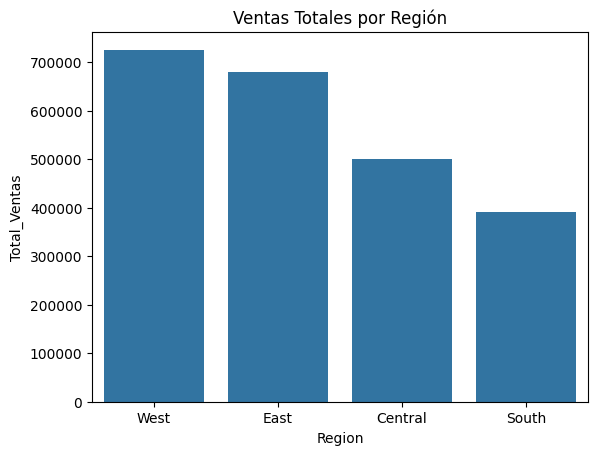

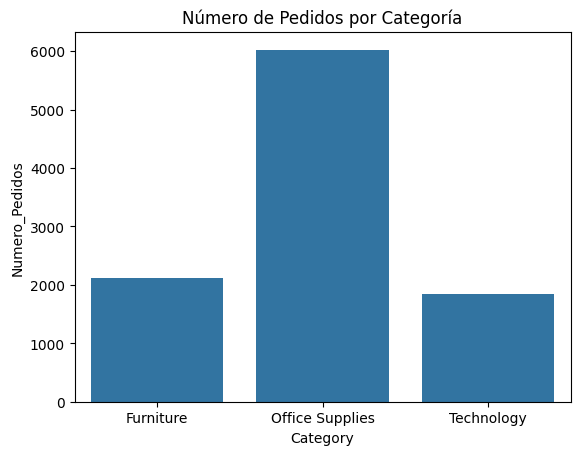

In [ ]:

# Ventas por región
sns.barplot(data=ventas_por_region, x="Region", y="Total_Ventas")
plt.title("Ventas Totales por Región")
plt.savefig('images/ventas_por_region.png', dpi=300, bbox_inches='tight')
plt.show()

# Pedidos por categoría
sns.barplot(data=pedidos_categoria, x="Category", y="Numero_Pedidos")
plt.title("Número de Pedidos por Categoría")
plt.savefig('images/numero_pedidos_categorias.png', dpi=300, bbox_inches='tight')
plt.show()